# Esercitazione di Laboratorio n. 5

#### Autore: Davide Cernuzio

Questa esercitazione è incentrata sull’applicazione di alcuni metodi numerici per risolvere semplici problemi di meccanica classica e di elettrodinamica.

### Parte I: Pendolo forzato con attrito

Studiare il moto del pendolo forzato al variare della forza di attrito

$\displaystyle \begin{cases} ma_t = -m g \sin \theta - \beta v + f_0 \cos \omega t\\ \\
 \displaystyle a_t = \ell \frac{d^2 \theta}{dt^2} \\ \\
 \displaystyle v = \ell \frac{d \theta}{dt} \end{cases} \\
 \displaystyle \fbox{$\frac{d^2 \theta}{dt^2} = -\gamma \frac{d \theta}{dt} - a \sin \theta + b \cos \omega_0 t \;\;\;\;\;\; \gamma \equiv \frac{\beta}{m}, \;\; a \equiv \frac{g}{l}, \;\; b \equiv \frac{f_0}{ml}$}$
 
Graficare la traiettoria nello spazio delle fasi, l'energia cinetica e potenziale per l'oscillatore armonico semplice e per i seguenti valori:

$\omega_0 = 2/3 \; s^{-1}; \;\; q = 0.5 \; s^{-2}, \;\; b = 0.9 s^{-2}, 0.15 s^{-2}$

Discutere i risultati.

In [7]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from time import time
t=time()

m   = 0.1
β   = 0.5
g   = 9.81
l   = 1
ω_0 = 1.5
f_0 = 0.4

θ_i, ω_i = mt.pi/180 * 10, 0
t_i, t_f = 0, 60


γ,a,b = β/m, g/l, f_0/(m*l)
#ω_0, q, b, a = 2/3, 0.5, 1.15, 1

F = lambda t, θ, ω: -γ*ω - a*mt.sin(θ) + b*mt.cos(ω_0*t)


def Runge_Kutta4(h = .0001):
    
    global h0, N, t_array, θ_array, ω_array
    h0 = h
    N = int( round((t_f - t_i)/h, 0) )
    
    t_array = np.append([t_i], np.empty(N))
    θ_array = np.append([θ_i], np.empty(N))
    ω_array = np.append([ω_i], np.empty(N))
    
    θ_j, ω_j = θ_i, ω_i
    
    for j in range(1, N+1):
        t_j = t_i + j*h
        t_array[j] = t_j
        
        k1 = h*F(t_j      , θ_j, ω_j)
        k2 = h*F(t_j + h/2, θ_j, ω_j + k1/2)
        k3 = h*F(t_j + h/2, θ_j, ω_j + k2/2)
        k4 = h*F(t_j + h  , θ_j, ω_j + k3)
        
        ω_j += (k1 + 2*k2 + 2*k3 + k4)/6
        ω_array[j] = ω_j
        
        k1 = h *  ω_j
        k2 = h * (ω_j + k1/2)
        k3 = h * (ω_j + k2/2)
        k4 = h * (ω_j + k3)
        
        θ_j += (k1 + 2*k2 + 2*k3 + k4)/6
        θ_array[j] = θ_j


Runge_Kutta4()

U_array = m*g*l*(1 - np.cos(θ_array))
K_array = m/2 * l**2 * ω_array**2


t=time()-t
print('Tempo di esecuzione: t =',round(t,3),'s')

Tempo di esecuzione: t = 3.914 s


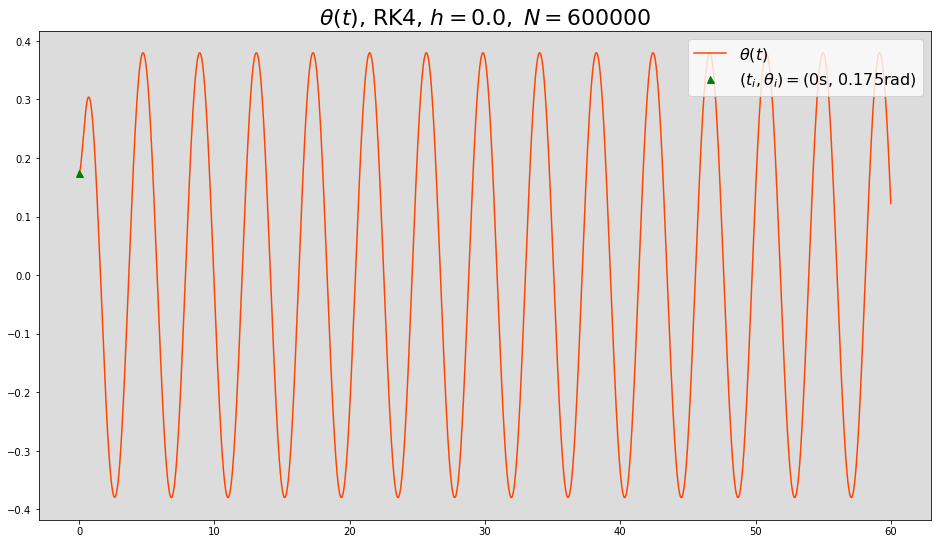

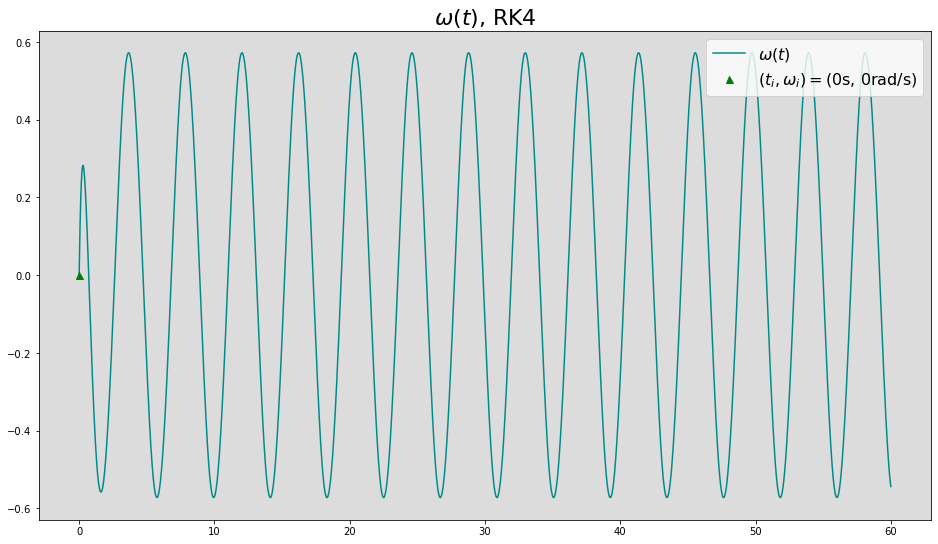

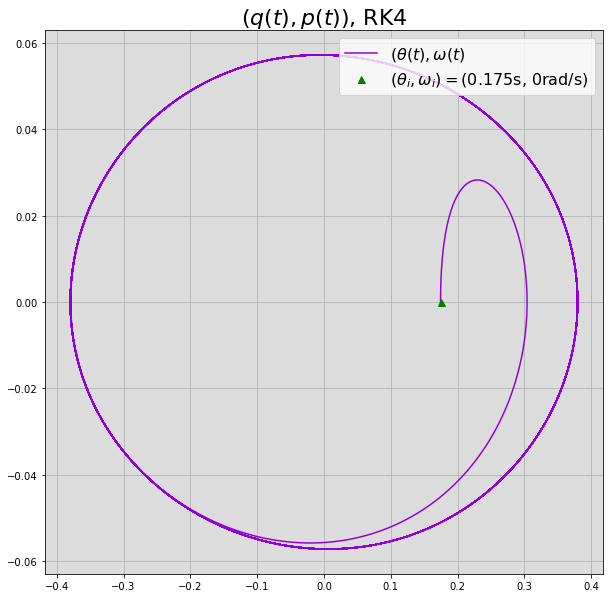

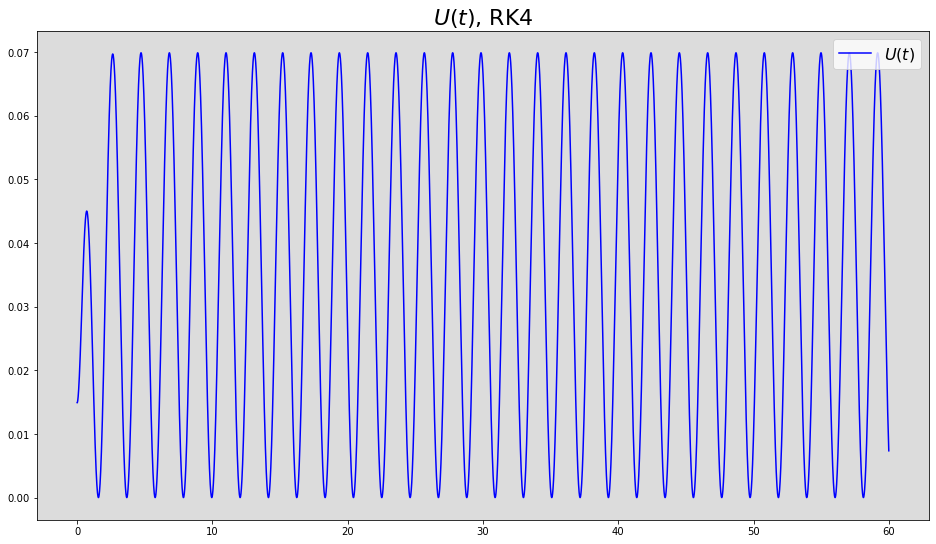

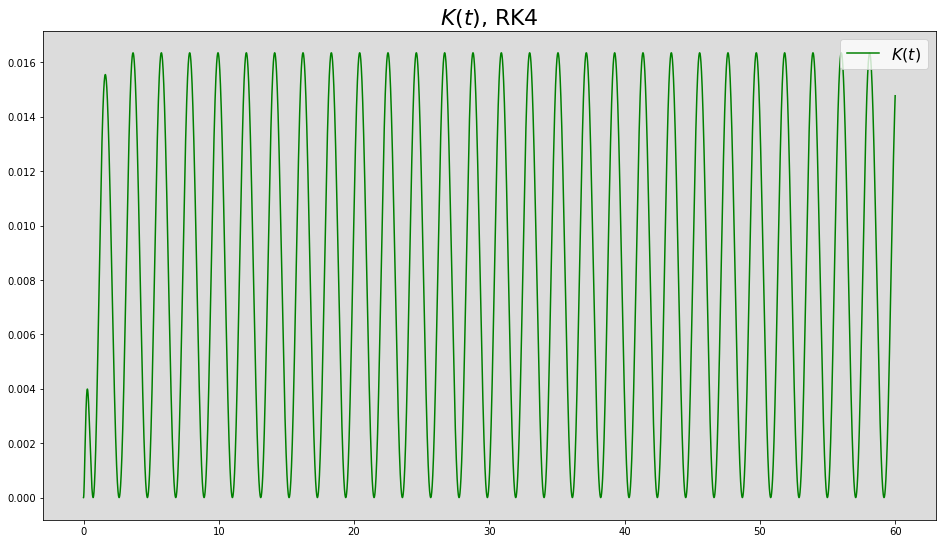

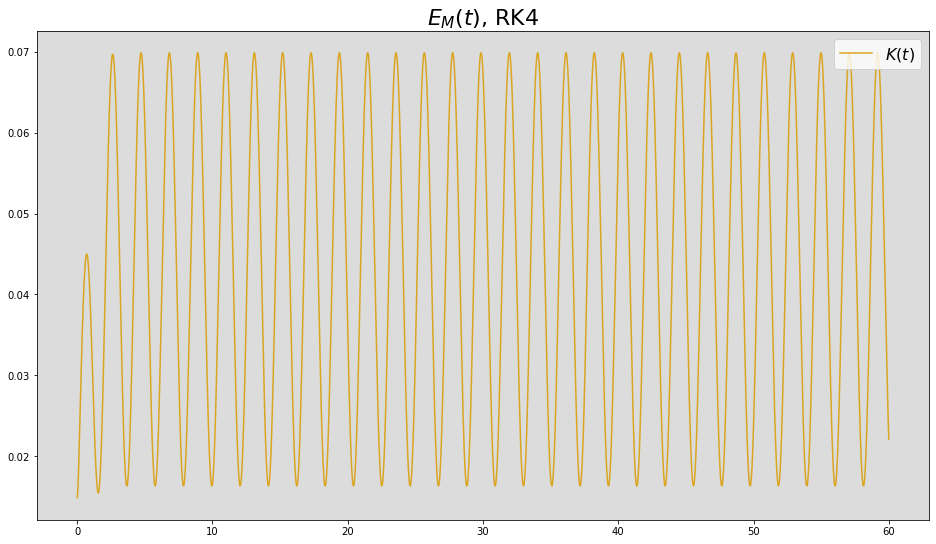

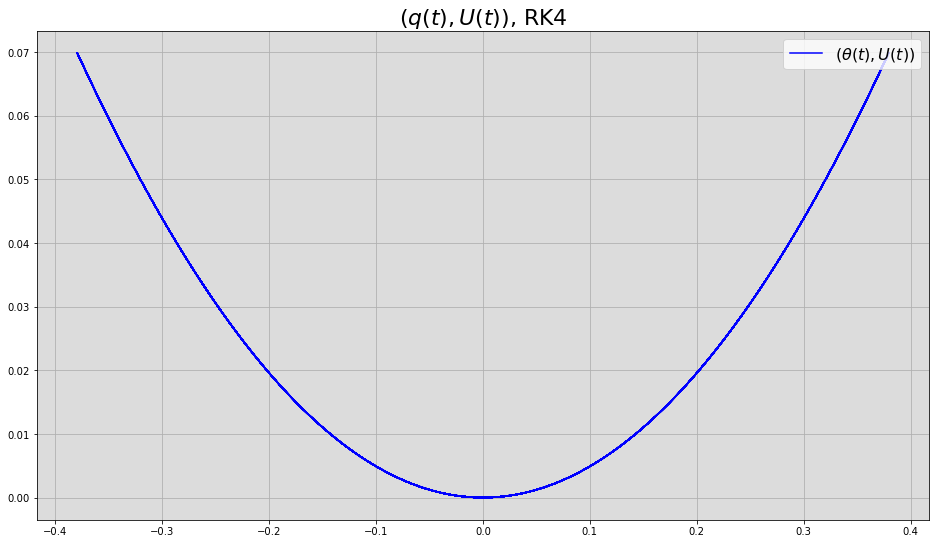

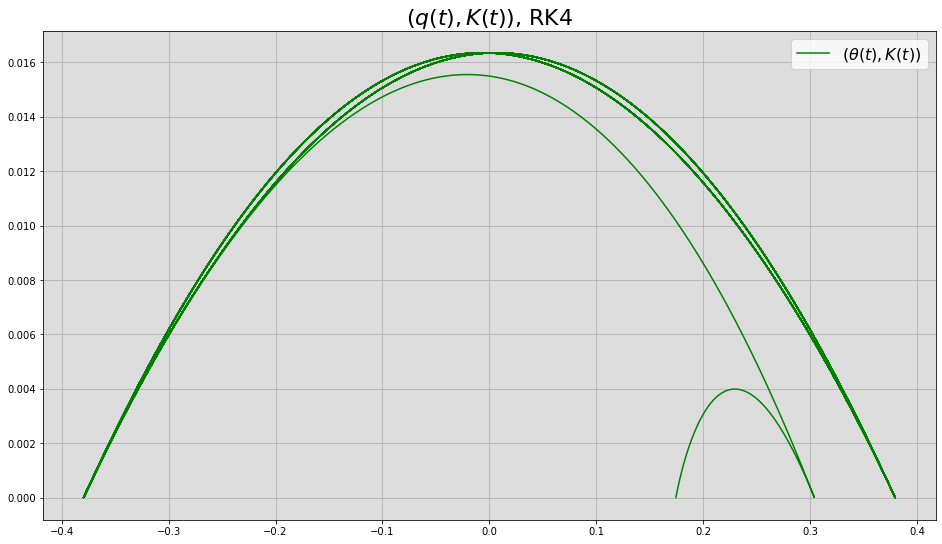

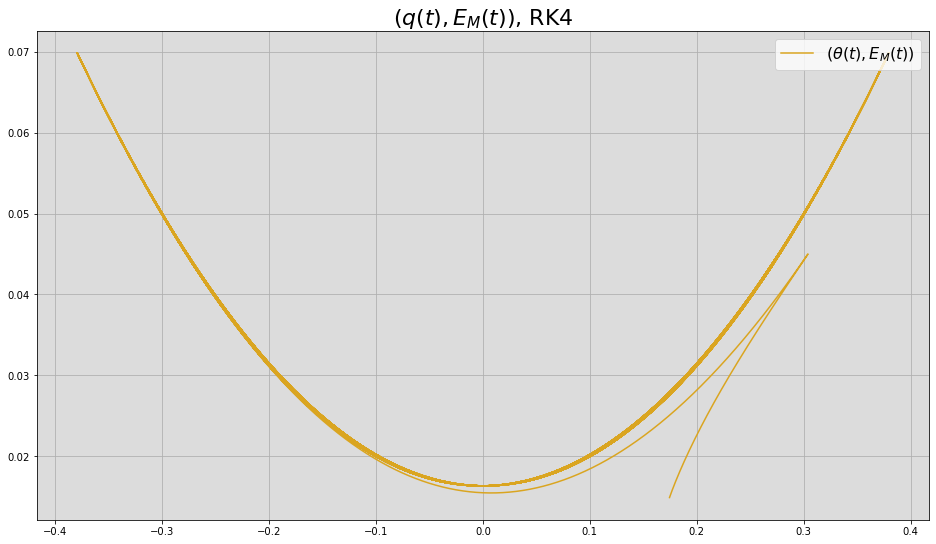

In [8]:
plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$\theta(t)$, RK4, $h = '+str(round(h0,3))+', \; N = '+str(N)+'$', size=22)
plt.plot(t_array, θ_array, 'orangered', ms=4, label=r'$\theta (t)$')
plt.plot([t_i],[θ_i],'^ g', ms=7, label=r'$(t_i,\theta_i) = ($' +str(round(t_i,3))+ 's, ' + str(round(θ_i,3))+'rad)')
plt.legend(fontsize=16, loc='upper right')
plt.show()

plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$\omega(t)$, RK4', size=22)
plt.plot(t_array, ω_array, 'darkcyan', ms=4, label=r'$\omega (t)$')
plt.plot([t_i],[ω_i],'^ g', ms=7, label=r'$(t_i,\omega_i) = ($' +str(round(t_i,3))+ 's, ' + str(round(ω_i,3))+'rad/s)')
plt.legend(fontsize=16, loc='upper right')
plt.show()

plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$(q(t), p(t))$, RK4', size=22)
plt.plot(θ_array, m*l*ω_array, 'darkviolet', ms=4, label=r'$(\theta(t), \omega(t)$')
plt.plot([θ_i],[m*l*ω_i],'^ g', ms=7, label=r'$(\theta_i,\omega_i) = ($' +str(round(θ_i,3))+ 's, ' + str(round(ω_i,3))+'rad/s)')
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.show()


plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$U(t)$, RK4', size=22)
plt.plot(t_array, U_array, 'blue', ms=4, label=r'$U (t)$')
plt.legend(fontsize=16, loc='upper right')
plt.show()

plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$K(t)$, RK4', size=22)
plt.plot(t_array, K_array, 'green', ms=4, label=r'$K (t)$')
plt.legend(fontsize=16, loc='upper right')
plt.show()

plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$E_M(t)$, RK4', size=22)
plt.plot(t_array, K_array + U_array, 'goldenrod', ms=4, label=r'$K (t)$')
plt.legend(fontsize=16, loc='upper right')
plt.show()


plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$(q(t), U(t))$, RK4', size=22)
plt.plot(θ_array, U_array, 'blue', ms=4, label=r'$(\theta(t), U(t))$')
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.show()

plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$(q(t), K(t))$, RK4', size=22)
plt.plot(θ_array, K_array, 'green', ms=4, label=r'$(\theta(t), K(t))$')
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.show()

plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$(q(t), E_M(t))$, RK4', size=22)
plt.plot(θ_array, K_array + U_array, 'goldenrod', ms=4, label=r'$(\theta(t), E_M(t))$')
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.show()

#del t_array, θ_array, ω_array